In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('heart-2.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df['target'].describe().T

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [5]:
df.corr()['target'].abs().sort_values(ascending=True)

fbs         0.028046
chol        0.085239
restecg     0.137230
trestbps    0.144931
age         0.225439
sex         0.280937
thal        0.344029
slope       0.345877
ca          0.391724
thalach     0.421741
oldpeak     0.430696
cp          0.433798
exang       0.436757
target      1.000000
Name: target, dtype: float64

In [6]:
df.nunique

<bound method DataFrame.nunique of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1 

In [7]:
# renaming the columns 
df=df.rename(columns={'cp':'chest pain','trestbps':'resting_bp','fbs':'blood sugar','restecg':'r_electrocardiographic','thalach':'max_hr','exang':'induced_angina','ca':'colured_vessel'})

In [8]:
df

,age,sex,chest pain,resting_bp,chol,blood sugar,r_electrocardiographic,max_hr,induced_angina,oldpeak,slope,colured_vessel,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


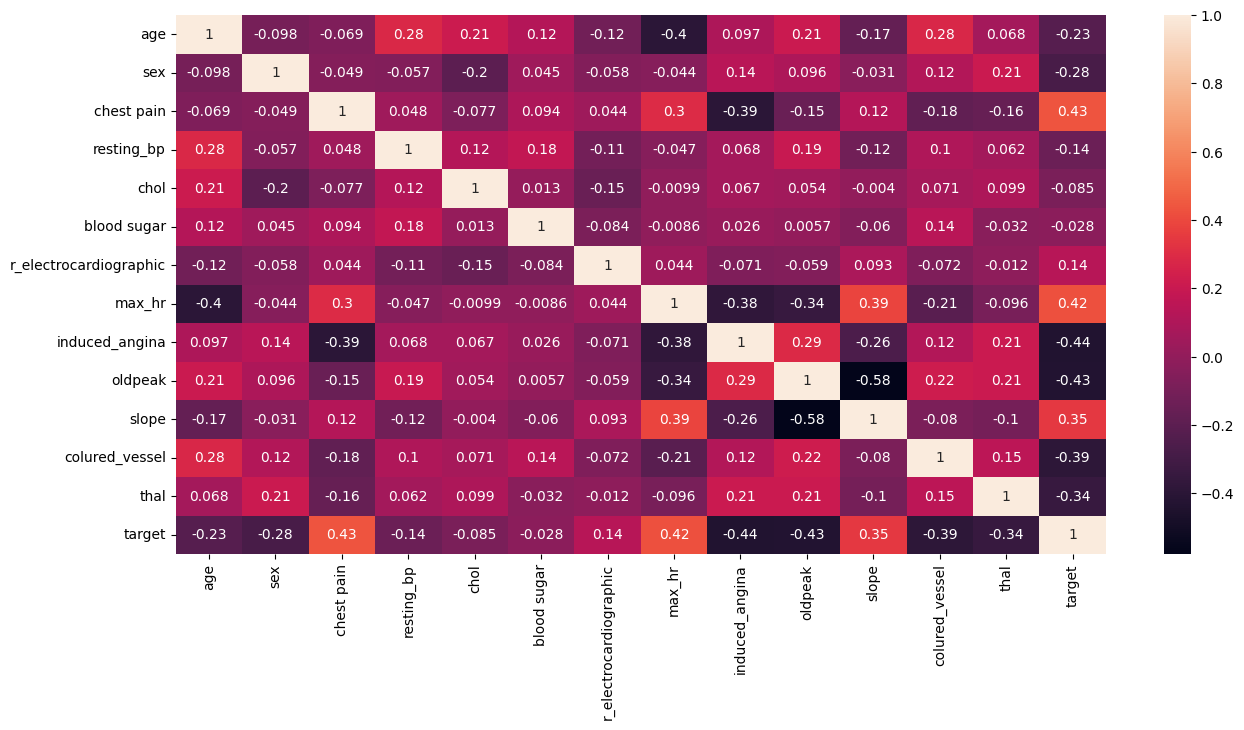

In [9]:
plt.subplots(figsize=(15,7))
ax=sns.heatmap(df.corr(),annot=True)

<Axes: >

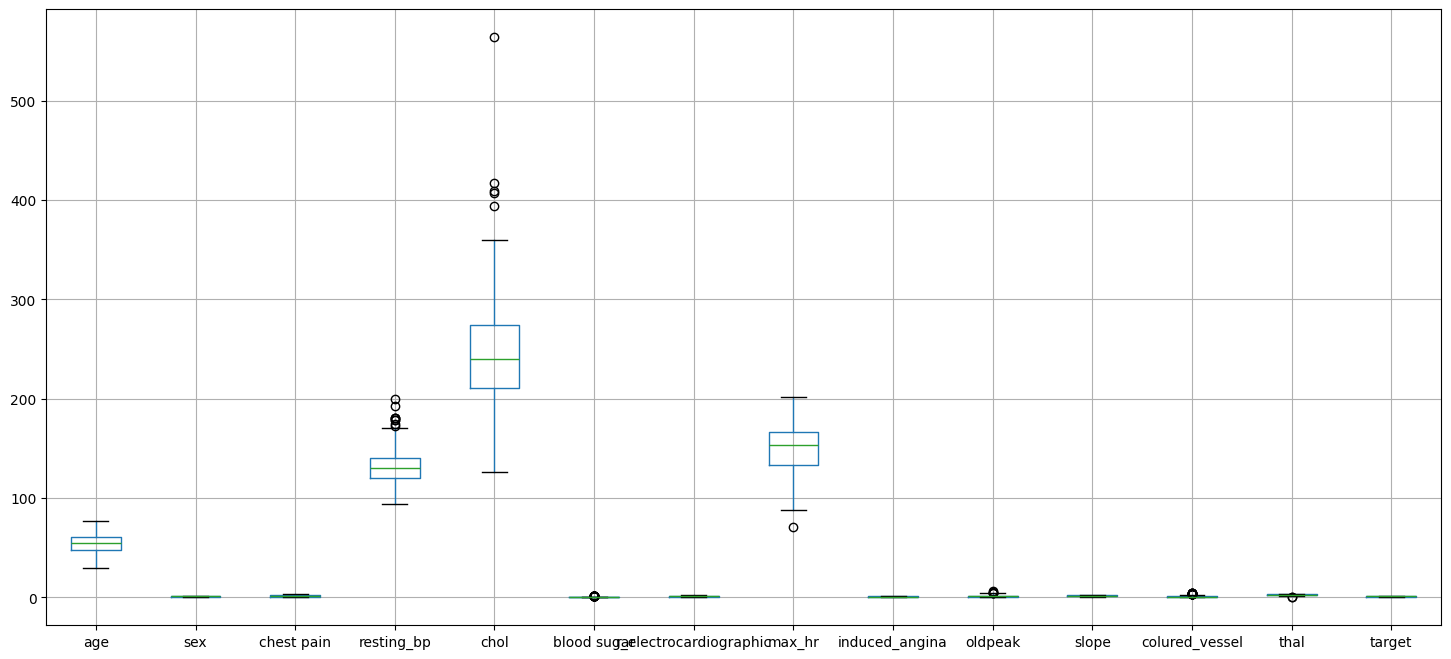

In [10]:
plt.figure(figsize=(18,8))
df.boxplot()

<Axes: xlabel='sex', ylabel='age'>

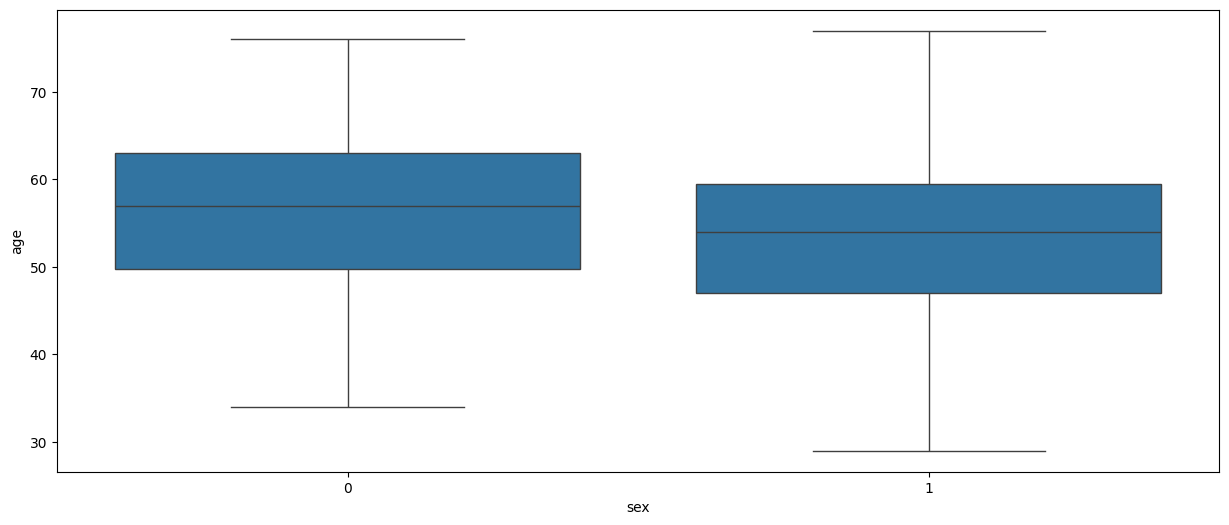

In [11]:
plt.figure(figsize=(15,6))
sns.boxplot(x='sex',y='age',data=df)

<Axes: xlabel='target'>

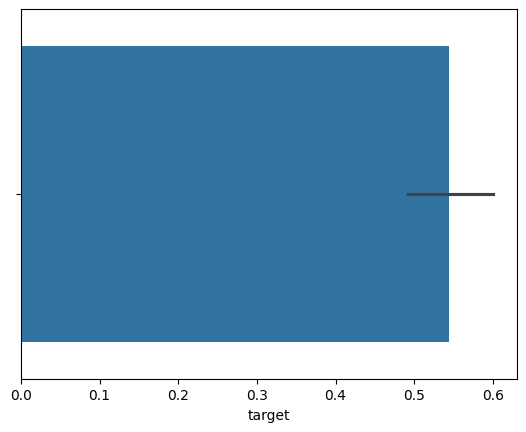

In [12]:
sns.barplot(x='target',data=df)


<Axes: xlabel='sex', ylabel='target'>

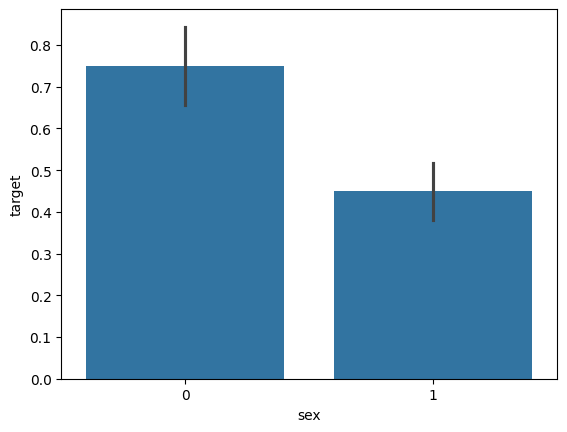

In [13]:
sns.barplot(x='sex',y='target',data=df)

<Axes: xlabel='chest pain', ylabel='target'>

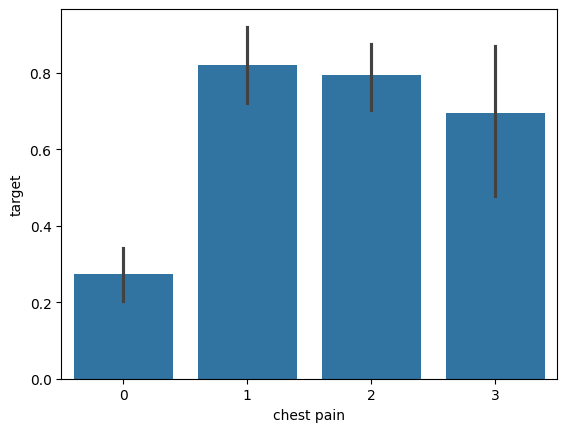

In [14]:
sns.barplot(x='chest pain',y='target',data=df)

<Axes: xlabel='r_electrocardiographic', ylabel='target'>

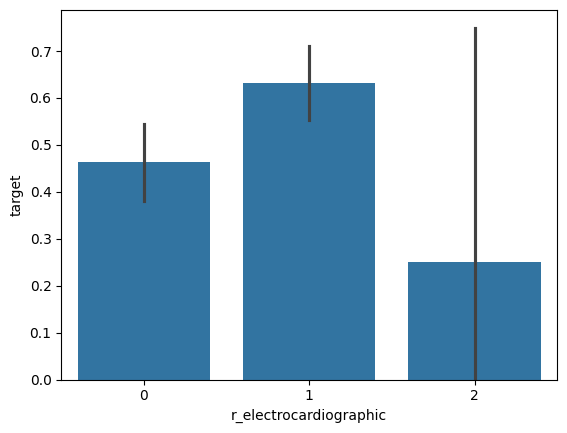

In [15]:
sns.barplot(x='r_electrocardiographic',y='target',data=df)

<Axes: xlabel='blood sugar', ylabel='chol'>

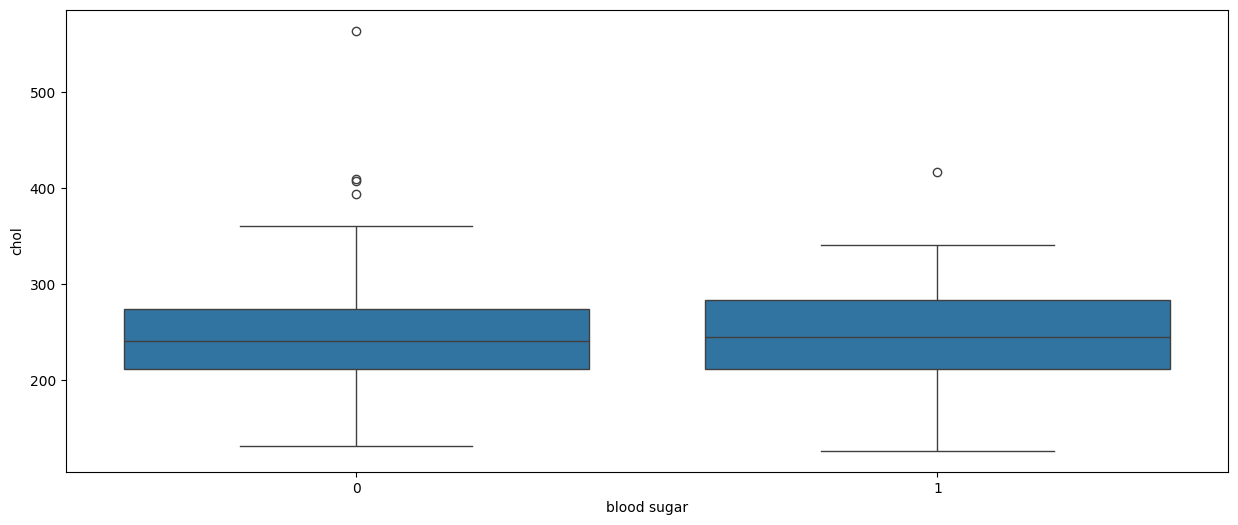

In [16]:
plt.figure(figsize=(15,6))
sns.boxplot(x='blood sugar',y='chol',data=df)

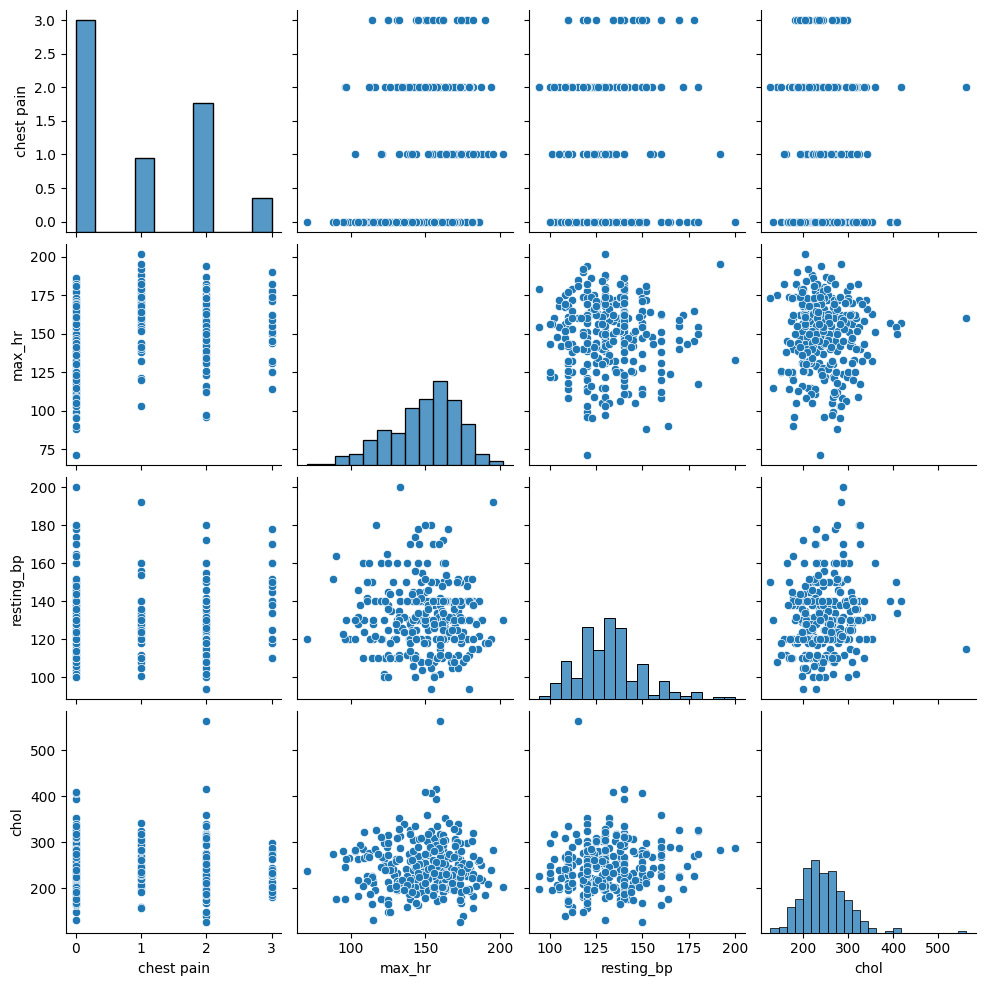

In [17]:
sns.pairplot(data=df[['chest pain','max_hr','resting_bp','chol']])

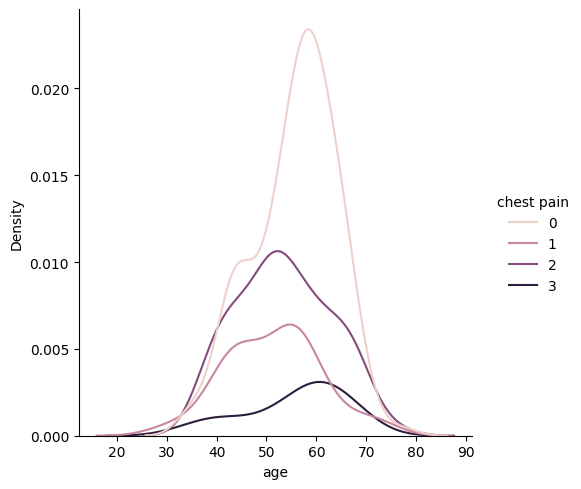

In [18]:
sns.displot(data=df ,x='age',hue='chest pain',kind='kde')

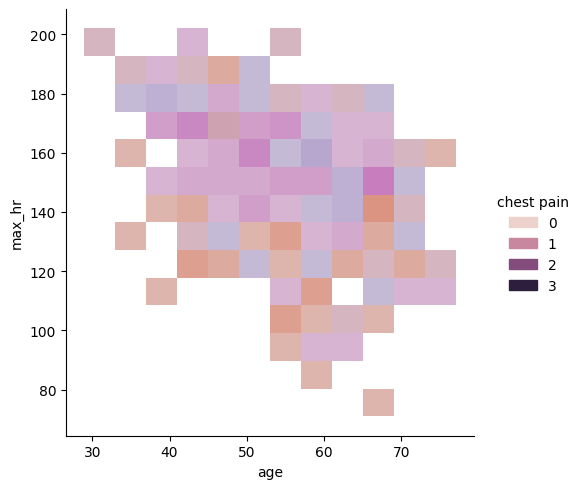

In [19]:
sns.displot(data=df ,x='age',y='max_hr',hue='chest pain',kind='hist')

In [20]:
countdisease=len(df[df.target==1])
countnotdisease=len(df[df.target==0])
print(countdisease,countnotdisease)

165 138


In [21]:
df['target'].unique()

array([1, 0])

In [22]:
np.argmax(df['max_hr'])
np.argmin(df['max_hr'])

np.int64(272)

In [23]:
"""from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['chest pain'] = le.fit_transform(df['chest pain'])
df['fbs'] = le.fit_transform(df['fbs'])
df['restecg'] = le.fit_transform(df['restecg'])
df['exang'] = le.fit_transform(df['exang'])
df['slope'] = le.fit_transform(df['slope'])
df['thal'] = le.fit_transform(df['thal'])"""


"from sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\ndf['sex'] = le.fit_transform(df['sex'])\ndf['chest pain'] = le.fit_transform(df['chest pain'])\ndf['fbs'] = le.fit_transform(df['fbs'])\ndf['restecg'] = le.fit_transform(df['restecg'])\ndf['exang'] = le.fit_transform(df['exang'])\ndf['slope'] = le.fit_transform(df['slope'])\ndf['thal'] = le.fit_transform(df['thal'])"

In [58]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score,accuracy_score,r2_score,precision_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [25]:
df.columns

Index(['age', 'sex', 'chest pain', 'resting_bp', 'chol', 'blood sugar',
       'r_electrocardiographic', 'max_hr', 'induced_angina', 'oldpeak',
       'slope', 'colured_vessel', 'thal', 'target'],
      dtype='object')

In [26]:
##Splitting the Data 

In [27]:
y = df["target"]
X = df.drop('target',axis=1)


In [28]:
X

,age,sex,chest pain,resting_bp,chol,blood sugar,r_electrocardiographic,max_hr,induced_angina,oldpeak,slope,colured_vessel,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [29]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [30]:
#Training the model 

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42,test_size=0.2,stratify=y)

In [32]:
model=RandomForestClassifier(random_state=42)

In [33]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [35]:
accuracy_score(y_test,y_pred)

0.8360655737704918

In [36]:
f1_score(y_test,y_pred)

0.8648648648648649

In [37]:
# trying tho find the maximum accuracy of the model 

In [38]:
scores=[]

for i in range(303):
    X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=i,test_size=0.2,stratify=y)
    model=RandomForestClassifier(random_state=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

In [39]:
sc=np.argmax(scores)
scores[sc]

0.9344262295081968

In [40]:
#using cross valodation to evaluate the model f1 score / accuracy 

In [41]:
#CORSS VALIDAION 
model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Mean CV Accuracy:", cv_scores.mean())


Mean CV Accuracy: 0.8381967213114756


In [42]:
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = final_model.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
#Trying to optimize the model by normalizing the columns 

In [45]:
from sklearn.compose import make_column_transformer

In [46]:
col_trans=make_column_transformer((MinMaxScaler(),['resting_bp','chol','max_hr']),remainder='passthrough')
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['resting_bp', 'chol', 'max_hr'])])

In [47]:
pipe=make_pipeline(col_trans,RandomForestClassifier(random_state=42))
pipe.fit(X_train,y_train)

C:\Users\athar\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['resting_bp', 'chol',
                                                   'max_hr'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [48]:
y_pipe_pred=pipe.predict(X_test)

In [49]:
f1_score(y_test,y_pipe_pred)

0.8529411764705882

In [50]:
import pickle

In [51]:
pickle.dump(pipe,open('RandomForest.pkl','wb'))

In [57]:
import numpy as np
import pandas as pd

# Your column names from X_test
columns = X_test.columns

input_df = pd.DataFrame([[70, 3, 3, 100, 100, 1, 0.3, 140, 0, 0.9, 0, 1, 1]], columns=columns)


y_pred = pipe.predict(input_df)

if(y_pred==1):
    print("This person have a heart disease.")
else:
    print("This person does not have a heart disease.")



This person have a heart disease.


In [81]:
model_lr=make_pipeline(col_trans,LogisticRegression( C=0.5,class_weight='balanced',random_state=42))
model_lr.fit(X_train,y_train)

C:\Users\athar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\athar\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['resting_bp', 'chol',
                                                   'max_hr'])])),
                ('logisticregression',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    random_state=42))])

In [82]:
y_pred_lr=model_lr.predict(X_test)

In [83]:
f1_score(y_test,y_pred_lr)

0.8253968253968254

In [84]:
pickle.dump(model_lr,open("LogisticRegression.pkl","wb"))

In [85]:
columns = X_test.columns

input_df = pd.DataFrame([[70, 3, 3, 100, 100, 1, 0.3, 140, 0, 0.9, 0, 1, 1]], columns=columns)


y_pred_lr = model_lr.predict(input_df)

if(y_pred==1):
    print("This person have a heart disease.")
else:
    print("This person does not have a heart disease.")

This person have a heart disease.
